In [16]:
from ultralytics import YOLO

# Load the trained model
model = YOLO(r"C:\tulu_script_crop_image\best (3).pt")  # Replace with the actual path to your best.pt file



image 1/1 C:\Users\swath\OneDrive\Desktop\tulu\numbers1234\test\images\-60-_jpeg.rf.466824be30b4131bb9252f80d3ccb2b5.jpg: 640x640 1 1, 483.1ms
Speed: 13.5ms preprocess, 483.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


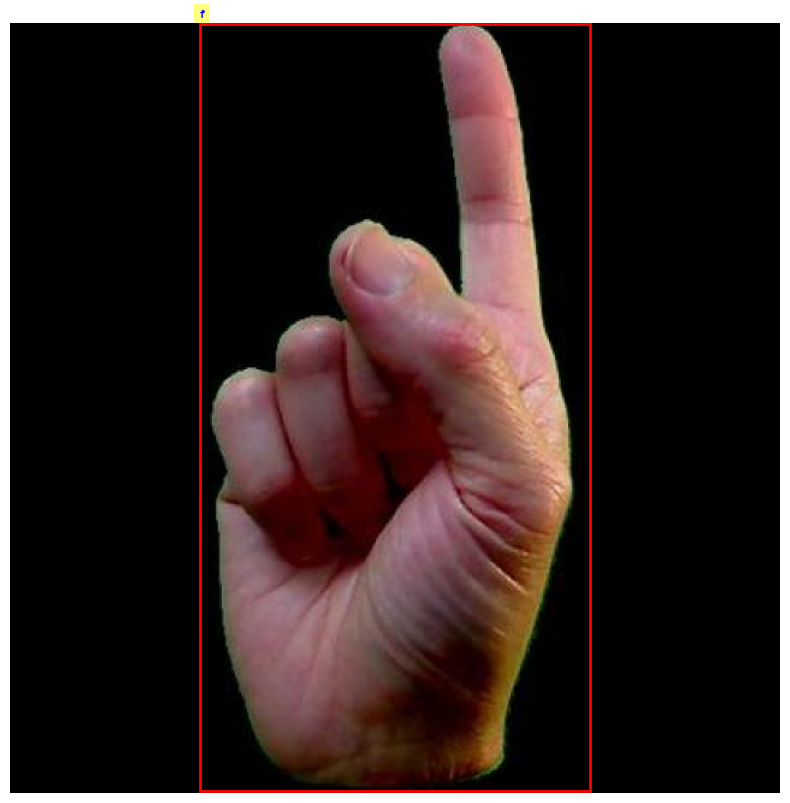

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from ultralytics import YOLO

# Path to the Tulu font
tulu_font_path = r"C:\tulu_script_crop_image\Baravu 2.otf"  # Replace with the correct path to your .otf file

# Load the font
tulu_font = fm.FontProperties(fname=tulu_font_path)

# Load the trained model
model = YOLO(r"C:\tulu_script_crop_image\best (3).pt")  # Replace with the actual path to your best.pt file

# Path to a single test image
image_path = r"C:\Users\swath\OneDrive\Desktop\tulu\numbers1234\test\images\-60-_jpeg.rf.466824be30b4131bb9252f80d3ccb2b5.jpg"  # Replace with your test image path

# Predict on the single image
results = model.predict(source=image_path, device="cpu", save=False)  # Adjust device if needed
result = results[0]

# Plot the image and overlay bounding boxes and labels
fig, ax = plt.subplots(figsize=(10, 10))

# Display the base image
base_image = plt.imread(image_path)
ax.imshow(base_image)

if result.boxes:  # Check if any detections exist
    for box in result.boxes:
        # Bounding box coordinates
        x1, y1, x2, y2 = box.xyxy[0]
        width, height = x2 - x1, y2 - y1
        
        # Predicted class and confidence
        cls = int(box.cls[0])
        conf = box.conf[0]
        tulu_label = str(cls)  # Convert the predicted value to string
        
        # Draw the bounding box
        rect = plt.Rectangle((x1, y1), width, height, linewidth=2, edgecolor="red", facecolor="none")
        ax.add_patch(rect)
        
        # Add the label in Tulu font above the bounding box
        ax.text(
            x1, y1 - 5,  # Position above the top-left corner of the bounding box
            f"{tulu_label}",
            fontproperties=tulu_font,
            fontsize=12,
            color="blue",
            bbox=dict(facecolor="yellow", alpha=0.5, edgecolor="none")  # Background for readability
        )
else:
    ax.text(
        0.5, 0.5,
        "No objects detected.",
        fontproperties=tulu_font,
        fontsize=16,
        ha="center",
        va="center",
        transform=ax.transAxes
    )

# Turn off axes
ax.axis("off")

# Show the annotated image
plt.show()
